## Inicializacion de Matrices

In [3]:
import numpy as np
import sympy as sp
from sympy import Matrix
from IPython.display import display, Math

S = np.array([
    [1 + 0j, 0 + 0j],
    [0 + 0j, np.exp(1j * np.pi / 2)]
],  dtype=complex)

T = np.array([
    [1 + 0j, 0 + 0j],
    [0 + 0j, np.exp(1j * np.pi / 4)]
],  dtype=complex)

X = np.array([
    [0 + 0j, 1 + 0j],
    [1 + 0j, 0 + 0j]
],  dtype=complex)

Y = np.array([
    [0 + 0j, 0 - 1j],
    [0 + 1j, 0 + 0j]
],  dtype=complex)


Z = np.array([
    [1 + 0j, 0 + 0j],
    [0 + 0j, -1 + 0j]
],  dtype=complex)

I = np.array([
    [1 + 0j, 0 + 0j],
    [0 + 0j, 1 + 0j]
],  dtype=complex)



## Apartado 1: Cálculo del producto tensorial.

In [ ]:
## aprovechando que el producto tensorial
## es asociativo
result_1 = np.kron(X, I)
result_2 = np.kron(Z, I)
result_3 = np.kron(result_1, result_2)
display(Math(r"X \otimes I \otimes Z \otimes I"))
display(Math(sp.latex(Matrix(result_3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
result_1 = np.kron(I, Y)
result_2 = np.kron(Z, X)
result_3 = np.kron(result_1, result_2)
display(Math(r"I \otimes Y \otimes Z \otimes X"))
display(Math(sp.latex(Matrix(result_3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
result_1 = np.kron(Z, X)
result_2 = np.kron(result_1, I)
display(Math(r"Z \otimes X \otimes I"))
display(Math(sp.latex(Matrix(result_2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Aplicaciones del producto tensorial

In [11]:
result_1 = np.kron((2/3) * X, Z)
result_2 = np.kron(result_1, I)

result_3 = np.kron((1/4) * I, Z)
result_4 = np.kron(result_3, X)

result_5 = np.kron((-5/6) * Y, Y)
result_6 = np.kron(result_5, Z)

operador_final = result_2 + result_4 + result_6

display(Math(r"2/3X \otimes Z \otimes I + 1/4I \otimes Z \otimes X - 5/6Y \otimes Y \otimes Z"))
display(Math(sp.latex(Matrix(operador_final))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])
ket10 = np.kron(ket1,ket0)
ket101 = np.kron(ket10,ket1)
ket01 = np.kron(ket0, ket1)
ket010 = np.kron(ket01, ket0)

psi = operador_final @ ket010 
final = np.kron(ket101, psi)

display(Math(
r"|101\rangle \otimes \left( \frac{2}{3}\, X \otimes Z \otimes I \;+\; \frac{1}{4}\, I \otimes Z \otimes X \;-\; \frac{5}{6}\, Y \otimes Y \otimes Z \right)\,|010\rangle"
))
display(Math(sp.latex(Matrix(final))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Visualización en la esfera de Bloch.

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


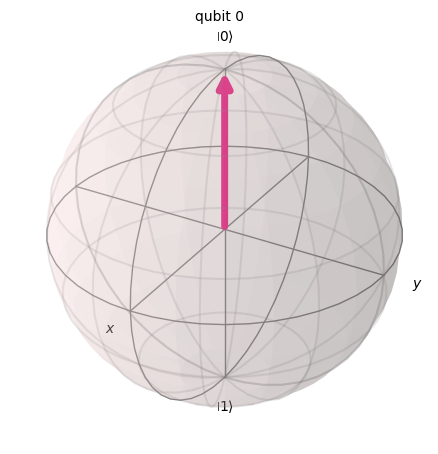

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector

ket0 = np.array([1, 0])
ket1 = np.array([0, 1])


## encontrar ∣0⟩ 
qc = QuantumCircuit(1)
qc.initialize(ket0, 0)


out_vector = Statevector(qc)
print(out_vector)
 
# dibujar esfera de bloch
plot_bloch_multivector(out_vector)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


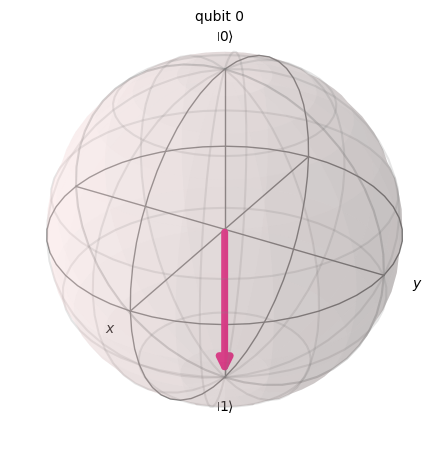

In [ ]:
## encontrar ∣1⟩ 
qc = QuantumCircuit(1)
qc.initialize(ket1, 0)


out_vector = Statevector(qc)
print(out_vector)
 
# dibujar esfera de bloch
plot_bloch_multivector(out_vector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


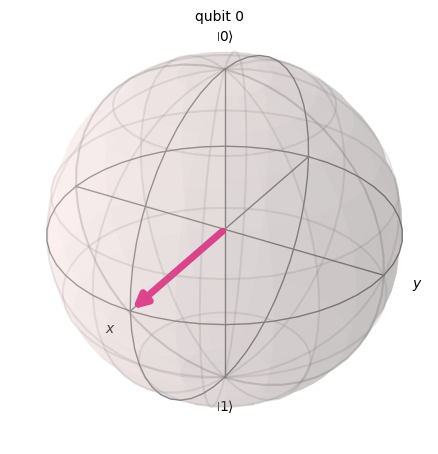

In [ ]:
## encontrar ∣+⟩ 
qc = QuantumCircuit(1)
qc.initialize(ket0, 0)
qc.h(0)

out_vector = Statevector(qc)
print(out_vector)
 
# dibujar esfera de bloch
plot_bloch_multivector(out_vector)

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


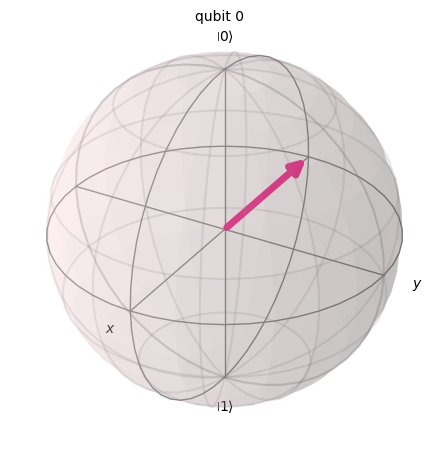

In [ ]:
qc = QuantumCircuit(1)
qc.initialize(ket0, 0)
qc.x(0)
qc.h(0)

out_vector = Statevector(qc)
print(out_vector)
 
# dibujar esfera de bloch
plot_bloch_multivector(out_vector)

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


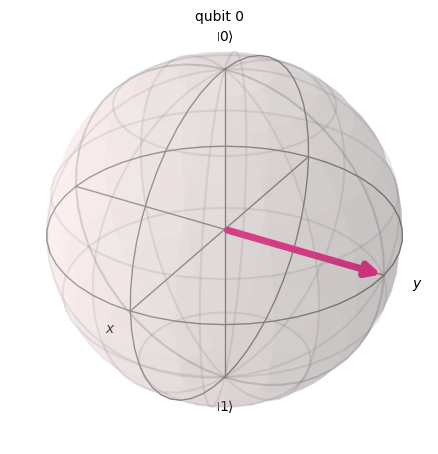

In [ ]:
## encontrar ∣+i⟩
qc = QuantumCircuit(1)
qc.initialize(ket0, 0)
qc.h(0)
qc.s(0)

out_vector = Statevector(qc)
print(out_vector)
 
# dibujar esfera de bloch
plot_bloch_multivector(out_vector)

Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


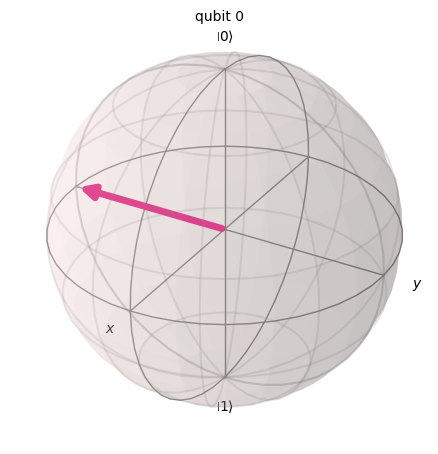

In [ ]:
## encontrar ∣-i⟩
qc = QuantumCircuit(1)
qc.initialize(ket0, 0)
qc.h(0)
qc.s(0)
qc.x(0)


out_vector = Statevector(qc)
print(out_vector)
 
# dibujar esfera de bloch
plot_bloch_multivector(out_vector)

## Efecto de las puertas cuánticas en la esfera de Bloch

In [ ]:
def apply_quantum_gate(quantum_cricuit: QuantumCircuit, quantum_gate: str):
    if quantum_gate == "X":
        quantum_cricuit.x(0)
    if quantum_gate == "Y":
        quantum_cricuit.y(0)
    if quantum_gate == "Z":
        quantum_cricuit.z(0)
    if quantum_gate == "H":
        quantum_cricuit.h(0)
    if quantum_gate == "":
        out_vector = Statevector(quantum_cricuit)

    out_vector = Statevector(quantum_cricuit)
    print(out_vector)
 
    # dibujar esfera de bloch
    fig = plot_bloch_multivector(out_vector)
    display(fig)

## Estado |0>

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


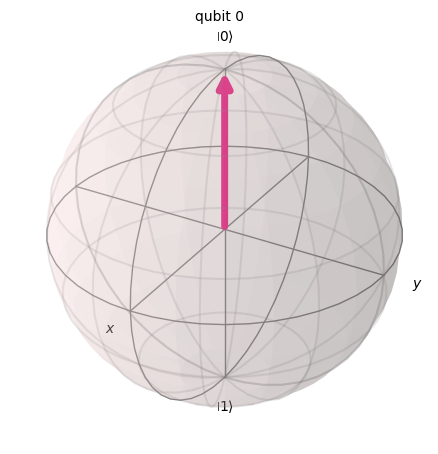

In [ ]:
qc = QuantumCircuit(1)
qc.initialize(ket0, 0)
apply_quantum_gate(qc, "")

## Aplicación de compuertas X, Y, Z, H a |0>

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


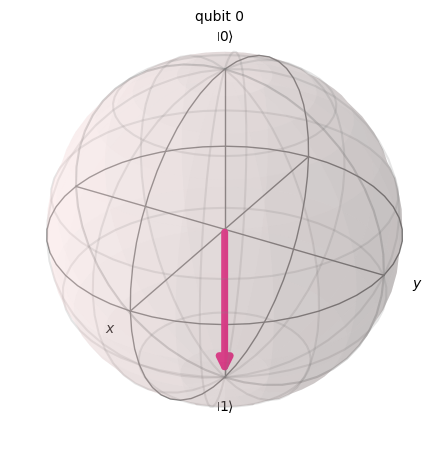

In [ ]:
qc = QuantumCircuit(1)
qc.initialize(ket0, 0)
apply_quantum_gate(qc, "X")

Statevector([0.+0.j, 0.+1.j],
            dims=(2,))


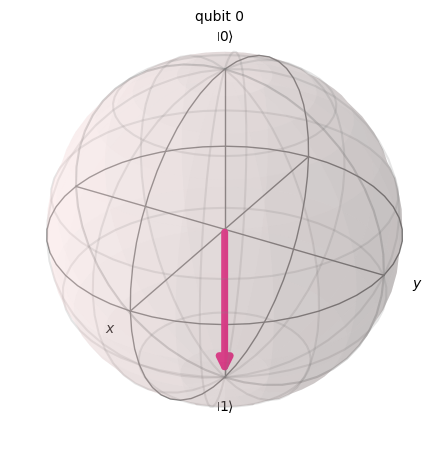

In [ ]:
qc = QuantumCircuit(1)
qc.initialize(ket0, 0)
apply_quantum_gate(qc, "Y")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


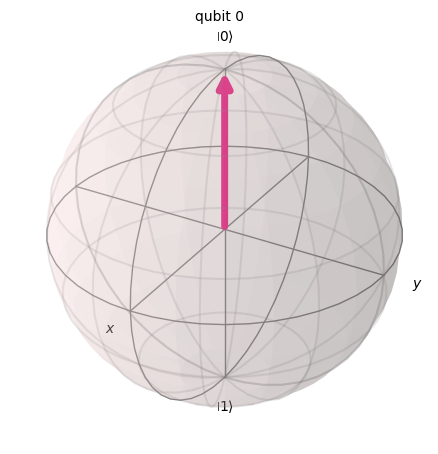

In [ ]:
qc = QuantumCircuit(1)
qc.initialize(ket0, 0)
apply_quantum_gate(qc, "Z")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


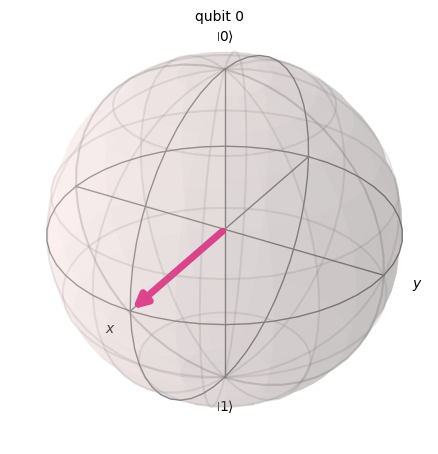

In [ ]:
qc = QuantumCircuit(1)
qc.initialize(ket0, 0)
apply_quantum_gate(qc, "H")

## Estado |1>

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


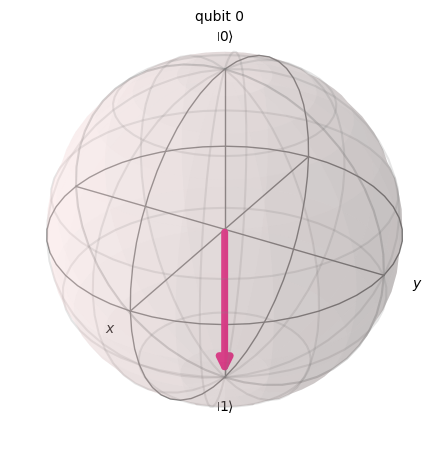

In [ ]:
qc = QuantumCircuit(1)
qc.initialize(ket1, 0)
apply_quantum_gate(qc, "")

## Aplicación de compuertas X, Y, Z, H a |1>

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


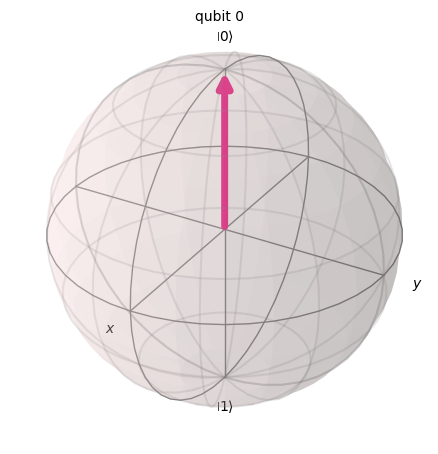

In [ ]:
qc = QuantumCircuit(1)
qc.initialize(ket1, 0)
apply_quantum_gate(qc, "X")

Statevector([0.-1.j, 0.+0.j],
            dims=(2,))


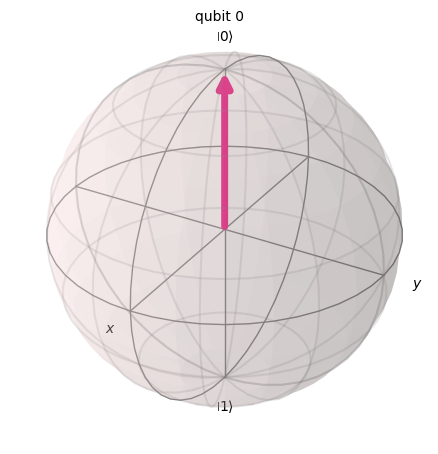

In [ ]:
qc = QuantumCircuit(1)
qc.initialize(ket1, 0)
apply_quantum_gate(qc, "Y")

Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


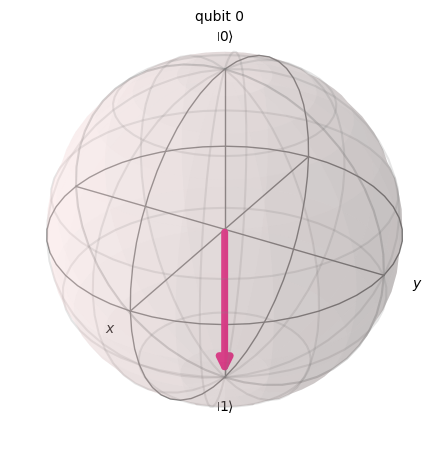

In [ ]:
qc = QuantumCircuit(1)
qc.initialize(ket1, 0)
apply_quantum_gate(qc, "Z")

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


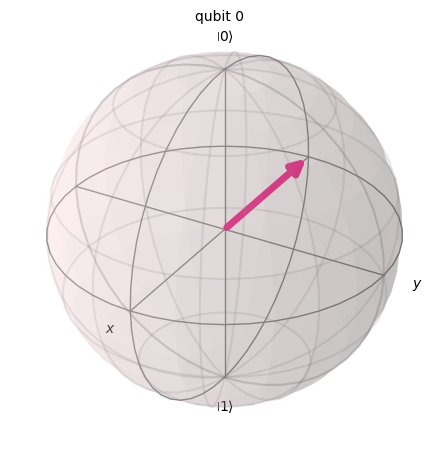

In [ ]:
qc = QuantumCircuit(1)
qc.initialize(ket1, 0)
apply_quantum_gate(qc, "H")